<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Quantum-Hello-World_Qiskit-braket-provider-withAmazon_Braket_mkbahk_20240909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업순서
1. Amazon Braket 환경 설정(확인만)
2. S3 환경설정(확인만)
3. (중요) IAM을 이용한 Access Key 설정 및 권한 부여
4. 원격 작업
5. 각종 로그 보기
6. 작업 환경 정리


In [1]:
!python3 -m pip install qiskit[visualization]==1.0.2
!python3 -m pip install qiskit-braket-provider==0.4.1
#!python3 -m pip install amazon-braket-sdk
#!python3 -m pip install boto3
#!python3 -m pip install botocore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f2b70aa33a58a10ad4f8eb21cf880e709c793070c667471d179a7c19d6f66822
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.p

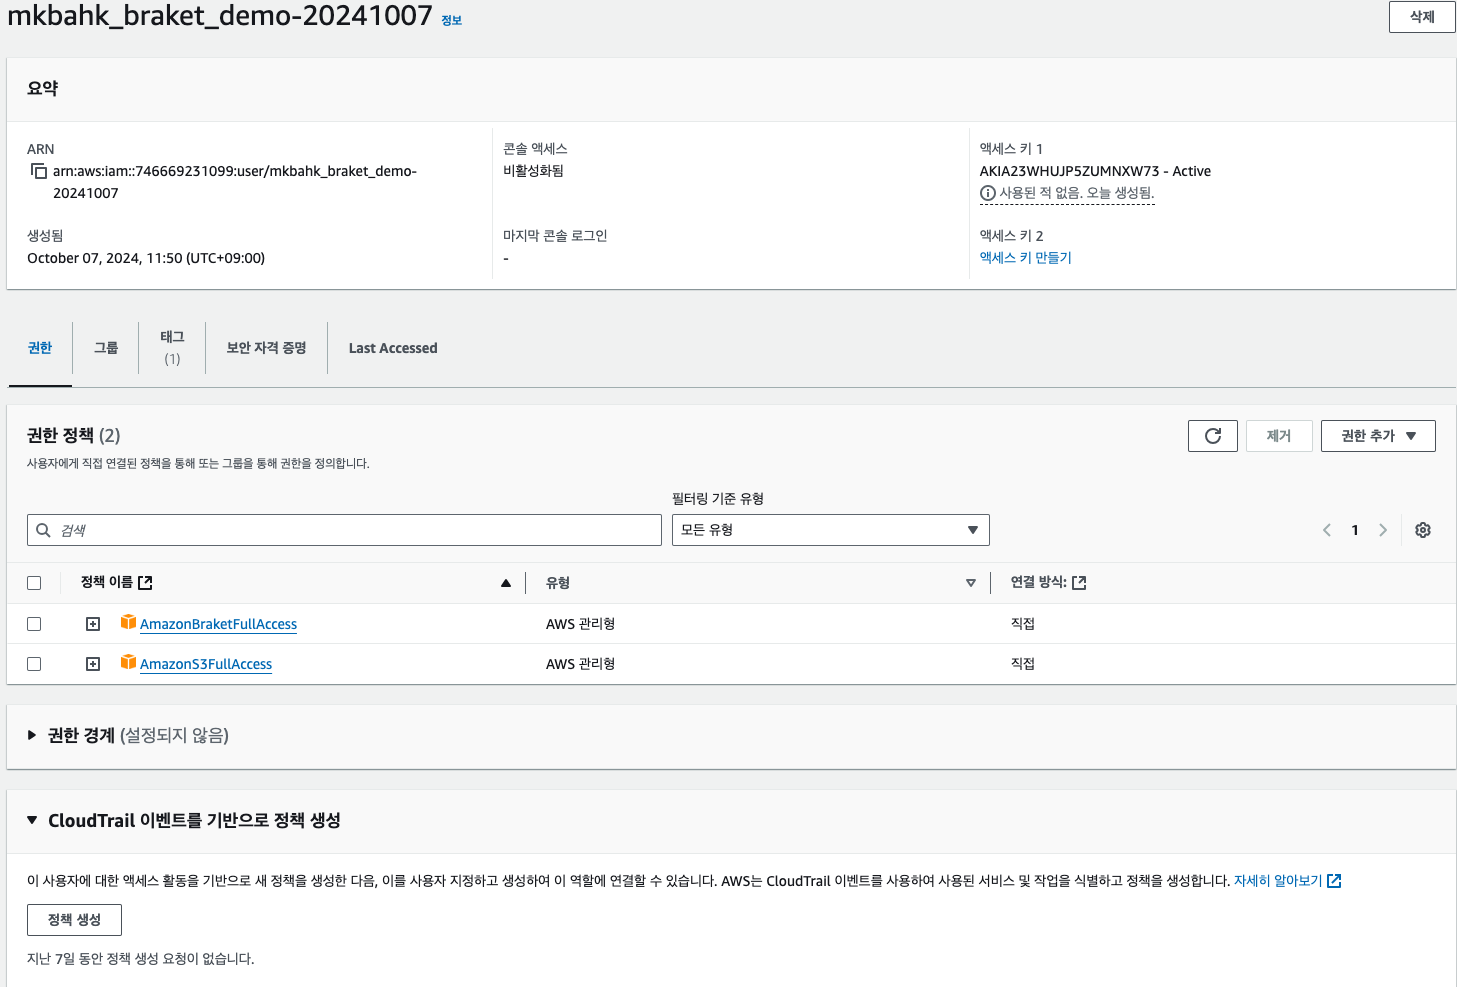

In [2]:
import os
# Set environment variables for AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = "여기에 Access 키"
os.environ['AWS_SECRET_ACCESS_KEY'] = "여기에 Secret 키"
os.environ['AWS_DEFAULT_REGION'] = "us-east-1"

# You can optionally set the s3 bucket and prefix using environment variables
#os.environ['AWS_BRAKET_S3_BUCKET'] = "snuqc"
#os.environ['AWS_BRAKET_S3_PREFIX'] = "amazonbraket"

In [3]:
from qiskit_braket_provider import BraketLocalBackend

local_simulator = BraketLocalBackend()
local_sv_simulator = BraketLocalBackend(name='braket_sv')
local_dm_simulator = BraketLocalBackend(name='braket_dm')

In [4]:
from qiskit_braket_provider import BraketProvider

provider = BraketProvider()
provider.backends(statuses=["ONLINE"], types=["SIMULATOR"])
print(provider.backends())

[BraketBackend[Ankaa-2], BraketBackend[Aria 1], BraketBackend[Aria 2], BraketBackend[Forte 1], BraketBackend[Garnet], BraketBackend[SV1], BraketBackend[TN1], BraketBackend[dm1]]


In [7]:
#IONQ_Aria_1 = provider.get_backend("Aria 1")
#IONQ_Aria_2 = provider.get_backend("Aria 2")
#IONQ_Forte_1 = provider.get_backend("Forte 1")

#Rigetti_Ankaa_2 = provider.get_backend("Ankaa-2")
#Rigetti_Aspen_M_3 = provider.get_backend("Aspen-M-3")

#IQM_Garnet = provider.get_backend("Garnet")

managed_sv1 = provider.get_backend("SV1")
#managed_dm1 = provider.get_backend("dm1")
#managed_tn1 = provider.get_backend("TN1")

In [8]:
backend = managed_sv1

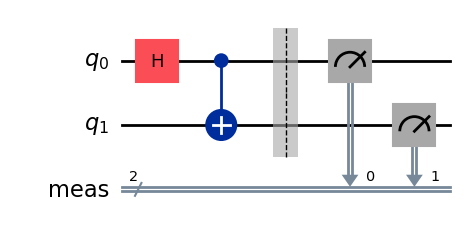

In [9]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

circuit.draw("mpl")

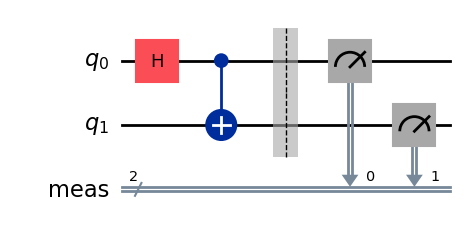

In [10]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend)
trans_qc.draw("mpl")

In [11]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while


print("Job status is", job.status() )

# 결과 출력
counts = job.result().get_counts()
print(counts)

/usr/local/lib/python3.10/dist-packages/qiskit_braket_provider/providers/adapter.py:457: UserWarning: The Qiskit circuit contains barrier instructions that are ignored.
  warnings.warn(


Job ID is arn:aws:braket:us-east-1:746669231099:quantum-task/2ae3b261-1789-4ff2-b08f-b2044a9d31d1 

Job status is JobStatus.QUEUED
Job status is JobStatus.DONE
{'00': 519, '11': 505}


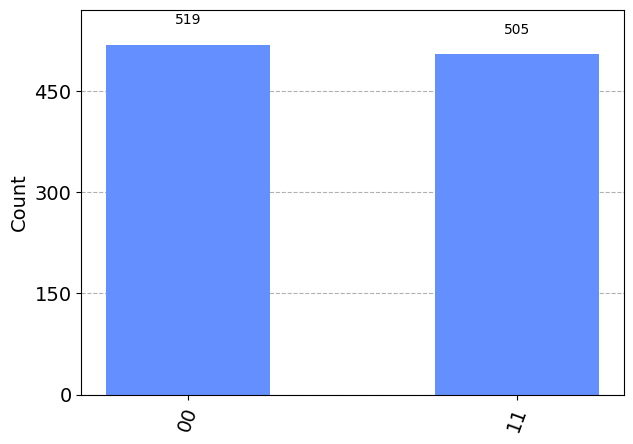

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)